# **Validación Cruzada (70%) y Métodos de Aprendizaje Supervisado**

En este notebook se implementa el proceso de validación cruzada utilizando el 70% de los datos para el entrenamiento y el 30% restante para la evaluación del modelo.
Este enfoque permite estimar de manera más robusta el desempeño de los algoritmos y reducir el riesgo de sobreajuste (overfitting), asegurando una mejor generalización sobre datos no vistos.

Asimismo, se aplican diferentes métodos de aprendizaje supervisado, con el objetivo de comparar su capacidad predictiva y determinar cuál ofrece el mejor rendimiento para el problema de diagnóstico de diabetes.
Los modelos implementados son los siguientes:

* Regresión Logística (Logistic Regression)
* Árbol de Decisión (Decision Tree)
* Red Neuronal (Neural Network)
* K-Vecinos Más Cercanos (K-Nearest Neighbors, KNN)

Para la evaluación del desempeño de los modelos se emplearán las siguientes métricas de evaluación:

* Precisión (Precision): mide la proporción de predicciones positivas que fueron correctas.

* Exhaustividad o Sensibilidad (Recall): indica la proporción de casos positivos correctamente identificados por el modelo.

* F1-Score: combina precisión y recall en una sola medida balanceada, útil cuando existe un desbalance en las clases.

* ROC-AUC: evalúa la capacidad del modelo para distinguir entre clases, proporcionando una métrica global del rendimiento clasificatorio.

Estas métricas permiten realizar una evaluación integral de los modelos, considerando tanto su capacidad de clasificación correcta como su habilidad para manejar posibles desequilibrios en los datos.

# Preparación de Datos

In [5]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Cargamos los datos normalizados
data = pd.read_excel("datos_numericos_diabetes_dataset.xlsx")
data.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes,family_history_diabetes_1
0,0,0.555556,0.258103,0.640496,0.564103,0.494382,0.269231,0.516432,0.366242,0.678571,0.144275,0.720690,1,0
1,1,0.416667,0.171669,0.334711,0.333333,0.438202,0.448718,0.000000,0.000000,0.294643,0.000000,0.281034,0,0
2,2,0.583333,0.068427,0.297521,0.358974,0.280899,0.589744,0.230047,0.019108,0.517857,0.101588,0.605172,1,1
3,3,0.777778,0.058824,0.487603,0.538462,0.337079,0.384615,0.136150,0.350318,0.705357,0.108537,0.867241,1,0
4,4,0.388889,0.130852,0.256198,0.282051,0.022472,0.410256,0.352113,0.414013,0.687500,0.355394,0.551724,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          100000 non-null  int64  
 1   age                                 100000 non-null  float64
 2   physical_activity_minutes_per_week  100000 non-null  float64
 3   bmi                                 100000 non-null  float64
 4   waist_to_hip_ratio                  100000 non-null  float64
 5   systolic_bp                         100000 non-null  float64
 6   hdl_cholesterol                     100000 non-null  float64
 7   ldl_cholesterol                     100000 non-null  float64
 8   triglycerides                       100000 non-null  float64
 9   glucose_fasting                     100000 non-null  float64
 10  insulin_level                       100000 non-null  float64
 11  hba1c                      

In [8]:
# Elimianos columna unnamed: 0 (innecesaria)
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  float64
 1   physical_activity_minutes_per_week  100000 non-null  float64
 2   bmi                                 100000 non-null  float64
 3   waist_to_hip_ratio                  100000 non-null  float64
 4   systolic_bp                         100000 non-null  float64
 5   hdl_cholesterol                     100000 non-null  float64
 6   ldl_cholesterol                     100000 non-null  float64
 7   triglycerides                       100000 non-null  float64
 8   glucose_fasting                     100000 non-null  float64
 9   insulin_level                       100000 non-null  float64
 10  hba1c                               100000 non-null  float64
 11  diagnosed_diabetes         

In [9]:
#Cargamos los datos discretizados
data_cat = pd.read_excel("datos_categoricos_diabetes_dataset.xlsx")
data_cat.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,family_history_diabetes,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes
0,0,Adulto Medio,Adecuada,0,Obesidad,Moderado,Hipertensión 1,Normal,Límite Alto,Normal,Diabetes,Normal,Diabetes,1
1,1,Adulto Medio,Baja,0,Normal,Bajo,Elevada,Normal,Óptimo,Normal,Normal,Bajo,Normal,0
2,2,Adulto Medio,Inactivo,1,Normal,Moderado,Normal,Alto,Óptimo,Normal,Prediabetes,Normal,Diabetes,1
3,3,Adulto Mayor,Inactivo,0,Sobrepeso,Moderado,Normal,Normal,Óptimo,Normal,Diabetes,Normal,Diabetes,1
4,4,Adulto Medio,Baja,0,Normal,Bajo,Normal,Normal,Casi Óptimo,Límite Alto,Diabetes,Normal,Diabetes,1


In [10]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          100000 non-null  int64 
 1   age                                 100000 non-null  object
 2   physical_activity_minutes_per_week  100000 non-null  object
 3   family_history_diabetes             100000 non-null  int64 
 4   bmi                                 100000 non-null  object
 5   waist_to_hip_ratio                  100000 non-null  object
 6   systolic_bp                         100000 non-null  object
 7   hdl_cholesterol                     100000 non-null  object
 8   ldl_cholesterol                     100000 non-null  object
 9   triglycerides                       100000 non-null  object
 10  glucose_fasting                     100000 non-null  object
 11  insulin_level                       1000

In [11]:
#Corrección del tipo de datos object a categorías
data_cat['age'] = data_cat['age'].astype('category')
data_cat['physical_activity_minutes_per_week'] = data_cat['physical_activity_minutes_per_week'].astype('category')
data_cat['family_history_diabetes'] = data_cat['family_history_diabetes'].astype('category')
data_cat['bmi'] = data_cat['bmi'].astype('category')
data_cat['waist_to_hip_ratio'] = data_cat['waist_to_hip_ratio'].astype('category')
data_cat['systolic_bp'] = data_cat['systolic_bp'].astype('category')
data_cat['hdl_cholesterol'] = data_cat['hdl_cholesterol'].astype('category')
data_cat['ldl_cholesterol'] = data_cat['ldl_cholesterol'].astype('category')
data_cat['triglycerides'] = data_cat['triglycerides'].astype('category')
data_cat['glucose_fasting'] = data_cat['glucose_fasting'].astype('category')
data_cat['insulin_level'] = data_cat['insulin_level'].astype('category')
data_cat['hba1c'] = data_cat['hba1c'].astype('category')
data_cat['diagnosed_diabetes'] = data_cat['diagnosed_diabetes'].astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Unnamed: 0                          100000 non-null  int64   
 1   age                                 100000 non-null  category
 2   physical_activity_minutes_per_week  100000 non-null  category
 3   family_history_diabetes             100000 non-null  category
 4   bmi                                 100000 non-null  category
 5   waist_to_hip_ratio                  100000 non-null  category
 6   systolic_bp                         100000 non-null  category
 7   hdl_cholesterol                     100000 non-null  category
 8   ldl_cholesterol                     100000 non-null  category
 9   triglycerides                       100000 non-null  category
 10  glucose_fasting                     100000 non-null  category
 11  insulin_level 

In [12]:
# Elimianos columna unnamed: 0 (innecesaria)
data_cat = data_cat.drop(['Unnamed: 0'], axis=1)
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

#1. División 70% - 30% (Datos Normalizados)

<Axes: xlabel='diagnosed_diabetes'>

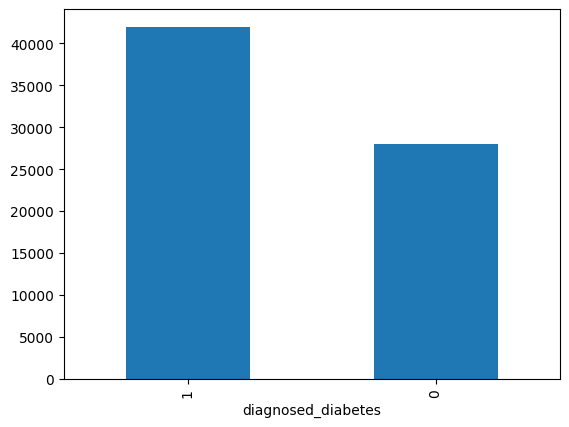

In [13]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y = data['diagnosed_diabetes'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train.value_counts().plot(kind='bar')

#2. Validación Cruzada

In [14]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring = ('f1_macro', 'roc_auc','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)# MUestreo Estratificado

# 3. Modelos Predictivos (Datos Normalizados)

3.1. KNN

In [15]:
#Método Perezoso (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.223842,6.390448,0.810893,0.901302,0.875313,0.965515,0.809238,0.898771,0.812994,0.904570
1,0.131298,4.975940,0.802087,0.901092,0.867851,0.965648,0.800121,0.898473,0.804821,0.904524
2,0.127234,5.225400,0.821992,0.900658,0.884130,0.965072,0.820234,0.898145,0.824226,0.903896
3,0.121931,4.919685,0.817359,0.900966,0.880135,0.965227,0.815687,0.898376,0.819464,0.904346
4,0.123098,5.012975,0.806803,0.902224,0.872110,0.965965,0.805599,0.899681,0.808214,0.905510
5,0.128221,5.007592,0.807524,0.902195,0.873533,0.965849,0.805829,0.899600,0.809702,0.905576
6,0.131228,4.918259,0.806870,0.901905,0.872235,0.965885,0.805245,0.899341,0.808929,0.905232
7,0.129326,5.075828,0.807091,0.901071,0.874792,0.965391,0.805717,0.898464,0.808750,0.904478
8,0.126734,4.980160,0.816513,0.900647,0.881251,0.964972,0.814632,0.897996,0.818988,0.904141
9,0.133867,5.089216,0.817160,0.901892,0.875123,0.965679,0.815066,0.899235,0.820060,0.905391


In [16]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

,0
fit_time,0.137678
score_time,5.159550
test_f1_macro,0.811429
train_f1_macro,0.901395
test_roc_auc,0.875647
train_roc_auc,0.965520
test_precision_macro,0.809737
train_precision_macro,0.898808
test_recall_macro,0.813615
train_recall_macro,0.904766


In [17]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_roc_auc']
print(comparacion_CV)

        Knn
0  0.875313
1  0.867851
2  0.884130
3  0.880135
4  0.872110
5  0.873533
6  0.872235
7  0.874792
8  0.881251
9  0.875123


3.2. Red Neuronal

In [18]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(20), learning_rate='constant',
                     learning_rate_init=0.1, momentum= 0.7, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,6.786851,0.024349,0.903584,0.902141,0.944146,0.943027,0.900887,0.899748,0.916298,0.915430
1,2.372452,0.017616,0.884586,0.889479,0.939292,0.942052,0.888673,0.892453,0.904524,0.908648
2,5.297661,0.017677,0.907787,0.906172,0.949374,0.942537,0.906409,0.904873,0.922976,0.921394
3,4.506030,0.017776,0.904129,0.903721,0.940524,0.943516,0.903471,0.902918,0.920119,0.919502
4,3.274668,0.041611,0.893674,0.896307,0.939925,0.942275,0.890618,0.893036,0.905060,0.907228
5,6.079667,0.021203,0.903965,0.905964,0.944452,0.943039,0.902309,0.904215,0.918571,0.920514
6,5.221160,0.022259,0.912401,0.906713,0.943509,0.943721,0.910856,0.905782,0.927560,0.922458
7,4.992768,0.017772,0.902991,0.900926,0.942937,0.942752,0.899829,0.898343,0.914643,0.913782
8,4.937908,0.025038,0.906873,0.907240,0.941682,0.943888,0.906162,0.906388,0.922917,0.923113
9,3.066681,0.017182,0.899414,0.900967,0.940638,0.943205,0.896924,0.898192,0.912381,0.913425


In [19]:
scores.mean()

,0
fit_time,4.653585
score_time,0.022248
test_f1_macro,0.901940
train_f1_macro,0.901963
test_roc_auc,0.942648
train_roc_auc,0.943001
test_precision_macro,0.900614
train_precision_macro,0.900595
test_recall_macro,0.916505
train_recall_macro,0.916549


In [20]:
#Se almacena en el df la medida a comparar
comparacion_CV['Red_Neuronal']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal
0  0.875313      0.944146
1  0.867851      0.939292
2  0.884130      0.949374
3  0.880135      0.940524
4  0.872110      0.939925
5  0.873533      0.944452
6  0.872235      0.943509
7  0.874792      0.942937
8  0.881251      0.941682
9  0.875123      0.940638


3.2. Regresión Logística

In [21]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Regresión Logística
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression(
    solver='liblinear',      # Algoritmo adecuado para datasets pequeños o medianos
    penalty='l2',            # Regularización L2 por defecto
    max_iter=1000,           # Aumentar iteraciones para asegurar convergencia
    random_state=42
)

scores = cross_validate(model_rl, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.211962,0.018954,0.854815,0.850054,0.933806,0.933183,0.857175,0.852835,0.852819,0.847765
1,0.231354,0.017801,0.848471,0.851084,0.928049,0.933833,0.849671,0.853885,0.847381,0.848779
2,0.199397,0.017635,0.847432,0.850256,0.936320,0.932954,0.851638,0.852888,0.844226,0.848071
3,0.232424,0.016877,0.850330,0.850608,0.934029,0.933141,0.853033,0.853335,0.848095,0.848356
4,0.221756,0.017198,0.844478,0.851099,0.928765,0.933739,0.846747,0.853904,0.842560,0.848792
5,0.244006,0.020970,0.850378,0.850173,0.936832,0.932827,0.854327,0.852903,0.847321,0.847919
6,0.196638,0.019784,0.850396,0.850191,0.935101,0.932993,0.853813,0.852966,0.847679,0.847906
7,0.235293,0.020471,0.850878,0.850479,0.932963,0.933257,0.854673,0.853143,0.847917,0.848270
8,0.179211,0.012803,0.854791,0.850398,0.933640,0.933163,0.856291,0.853204,0.853452,0.848091
9,0.168473,0.012201,0.851344,0.850597,0.932149,0.933348,0.853713,0.853307,0.849345,0.848356


In [22]:
scores.mean()

,0
fit_time,0.212051
score_time,0.017469
test_f1_macro,0.850332
train_f1_macro,0.850494
test_roc_auc,0.933165
train_roc_auc,0.933244
test_precision_macro,0.853108
train_precision_macro,0.853237
test_recall_macro,0.848080
train_recall_macro,0.848230


In [23]:
#Se almacena en el df la medida a comparar
comparacion_CV['Regresion_Logistica']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica
0  0.875313      0.944146             0.933806
1  0.867851      0.939292             0.928049
2  0.884130      0.949374             0.936320
3  0.880135      0.940524             0.934029
4  0.872110      0.939925             0.928765
5  0.873533      0.944452             0.936832
6  0.872235      0.943509             0.935101
7  0.874792      0.942937             0.932963
8  0.881251      0.941682             0.933640
9  0.875123      0.940638             0.932149


#4. División 70% - 30% (Datos discretizados)

In [24]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

In [25]:
# Creamos variables dummy para convertir las categorías a números
data_cat = pd.get_dummies(data_cat, columns=['age', 'physical_activity_minutes_per_week',
                                             'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                                             'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
                                             'glucose_fasting', 'insulin_level', 'hba1c'], drop_first=False, dtype=int)

# Variables con dos categorías (drop_first=True)
data_cat = pd.get_dummies(data_cat, columns=['family_history_diabetes'], drop_first=True, dtype=int)

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [26]:
#Se codifican las categorias de la VARIABLE OBJETIVO (Cambiar high y low por 0 y 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_cat["diagnosed_diabetes"]=labelencoder.fit_transform(data_cat["diagnosed_diabetes"]) #Objetivo

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


<Axes: xlabel='diagnosed_diabetes'>

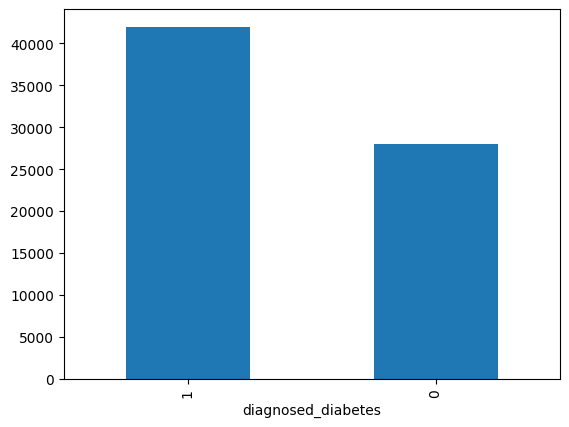

In [27]:
#División 70-30
from sklearn.model_selection import train_test_split
X_C = data_cat.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y_C = data_cat['diagnosed_diabetes'] #Variable objetivo
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(X_C, Y_C, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train_C.value_counts().plot(kind='bar')

In [28]:
#Método de ML a usar en la validación cruzada
from sklearn.tree import DecisionTreeClassifier # Importar el clasificador

# Inicializar el modelo de Árbol de Decisión para clasificación
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=None) # Usar el clasificador

scores = cross_validate(modelTree, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False) # return_train_score=True saber si tiene overfitting
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.159268,0.015834,0.913968,0.913937,0.938676,0.965310,0.910879,0.911514,0.926429,0.927750
1,0.168391,0.022683,0.912180,0.914241,0.936744,0.965562,0.909495,0.911880,0.925417,0.928180
2,0.161496,0.016660,0.898447,0.915565,0.922993,0.966315,0.897590,0.913118,0.913929,0.929416
3,0.161366,0.015321,0.910122,0.914557,0.936441,0.964984,0.908005,0.912325,0.924286,0.928735
4,0.158242,0.015670,0.906636,0.914807,0.930318,0.966576,0.904532,0.912369,0.920655,0.928636
5,0.162160,0.015091,0.910561,0.914311,0.936556,0.965697,0.907805,0.911746,0.923571,0.927882
6,0.171494,0.018371,0.902621,0.915016,0.929268,0.966178,0.900143,0.912281,0.915774,0.928292
7,0.149967,0.014825,0.908073,0.914380,0.932404,0.965424,0.905888,0.912067,0.922024,0.928411
8,0.170682,0.015213,0.909155,0.914433,0.936722,0.965657,0.906605,0.912066,0.922500,0.928371
9,0.160070,0.014905,0.911193,0.914379,0.935190,0.965231,0.908634,0.911909,0.924570,0.928135


In [29]:
scores.mean()

,0
fit_time,0.162314
score_time,0.016457
test_f1_macro,0.908296
train_f1_macro,0.914563
test_roc_auc,0.933531
train_roc_auc,0.965694
test_precision_macro,0.905958
train_precision_macro,0.912127
test_recall_macro,0.921915
train_recall_macro,0.928381


In [30]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree
0  0.875313      0.944146             0.933806  0.938676
1  0.867851      0.939292             0.928049  0.936744
2  0.884130      0.949374             0.936320  0.922993
3  0.880135      0.940524             0.934029  0.936441
4  0.872110      0.939925             0.928765  0.930318
5  0.873533      0.944452             0.936832  0.936556
6  0.872235      0.943509             0.935101  0.929268
7  0.874792      0.942937             0.932963  0.932404
8  0.881251      0.941682             0.933640  0.936722
9  0.875123      0.940638             0.932149  0.935190


#5 Métodos de Ensambles

**Random Forest**

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo de Random Forest
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

scores = cross_validate(model_rf, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.511546,0.205848,0.918229,0.914720,0.940238,0.981345,0.915944,0.913057,0.932500,0.929806
1,2.373638,0.255066,0.916103,0.915051,0.938142,0.981353,0.914123,0.913337,0.930774,0.930078
2,2.665058,0.222731,0.902933,0.916633,0.928811,0.981516,0.903067,0.914732,0.919821,0.931447
3,2.433223,0.199792,0.912401,0.915387,0.938769,0.981366,0.910856,0.913660,0.927560,0.930408
4,2.708665,0.252707,0.909985,0.915670,0.934450,0.981585,0.908752,0.913895,0.925476,0.930633
5,2.553921,0.216365,0.916109,0.915181,0.941151,0.981415,0.914163,0.913474,0.930833,0.930223
6,2.592542,0.214402,0.909116,0.916204,0.934028,0.981325,0.907894,0.914341,0.924583,0.931056
7,3.145440,0.263958,0.911438,0.915432,0.936505,0.981352,0.910226,0.913677,0.927024,0.930415
8,2.567824,0.216637,0.913406,0.915244,0.939072,0.981407,0.911793,0.913523,0.928512,0.930269
9,2.521729,0.224846,0.913389,0.915444,0.939285,0.981345,0.911652,0.913670,0.928258,0.930403


In [32]:
scores.mean()

,0
fit_time,2.607359
score_time,0.227235
test_f1_macro,0.912311
train_f1_macro,0.915497
test_roc_auc,0.937045
train_roc_auc,0.981401
test_precision_macro,0.910847
train_precision_macro,0.913737
test_recall_macro,0.927534
train_recall_macro,0.930474


In [33]:
#Se almacena en el df la medida a comparar
comparacion_CV['Random_Forest']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree  Random_Forest
0  0.875313      0.944146             0.933806  0.938676       0.940238
1  0.867851      0.939292             0.928049  0.936744       0.938142
2  0.884130      0.949374             0.936320  0.922993       0.928811
3  0.880135      0.940524             0.934029  0.936441       0.938769
4  0.872110      0.939925             0.928765  0.930318       0.934450
5  0.873533      0.944452             0.936832  0.936556       0.941151
6  0.872235      0.943509             0.935101  0.929268       0.934028
7  0.874792      0.942937             0.932963  0.932404       0.936505
8  0.881251      0.941682             0.933640  0.936722       0.939072
9  0.875123      0.940638             0.932149  0.935190       0.939285


**XGBoost**

In [34]:
# XGBoost
from xgboost import XGBClassifier

# Definir el modelo XGBoost
model_xgb = XGBClassifier(
    n_estimators=100,        # número de árboles
    learning_rate=0.1,       # tasa de aprendizaje
    max_depth=5,             # profundidad máxima de cada árbol
    subsample=0.8,           # proporción de datos usados por árbol
    colsample_bytree=0.8,    # proporción de características usadas por árbol
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'    # métrica interna (evita warnings)
)

scores = cross_validate(model_xgb, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:08:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:08:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:08:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:08:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:08:44] WARNING: /w

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.078588,0.090436,0.918547,0.912317,0.946637,0.946976,0.916419,0.911056,0.933095,0.927868
1,0.752406,0.054577,0.916700,0.912522,0.942951,0.947312,0.914815,0.911230,0.931548,0.928040
2,0.704924,0.050510,0.903092,0.913988,0.929816,0.948787,0.903342,0.912482,0.920119,0.929271
3,0.742928,0.051218,0.913151,0.912868,0.944037,0.947259,0.911765,0.911526,0.928571,0.928331
4,0.707458,0.052959,0.911024,0.913136,0.939800,0.947743,0.909956,0.911754,0.926786,0.928556
5,0.707288,0.069288,0.916274,0.912537,0.947836,0.946735,0.914446,0.911243,0.931190,0.928054
6,0.714404,0.049279,0.910309,0.913215,0.938460,0.947724,0.909310,0.911821,0.926131,0.928622
7,0.682145,0.051706,0.911591,0.913073,0.938734,0.947578,0.910437,0.911700,0.927262,0.928503
8,0.683468,0.052406,0.913861,0.912789,0.944905,0.946791,0.912371,0.911458,0.929167,0.928265
9,0.729416,0.060333,0.914292,0.912742,0.944532,0.947103,0.912762,0.911415,0.929507,0.928228


In [35]:
scores.mean()

,0
fit_time,0.850302
score_time,0.058271
test_f1_macro,0.912884
train_f1_macro,0.912919
test_roc_auc,0.941771
train_roc_auc,0.947401
test_precision_macro,0.911562
train_precision_macro,0.911569
test_recall_macro,0.928338
train_recall_macro,0.928374


In [36]:
#Se almacena en el df la medida a comparar
comparacion_CV['model_xgb']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree  Random_Forest  \
0  0.875313      0.944146             0.933806  0.938676       0.940238   
1  0.867851      0.939292             0.928049  0.936744       0.938142   
2  0.884130      0.949374             0.936320  0.922993       0.928811   
3  0.880135      0.940524             0.934029  0.936441       0.938769   
4  0.872110      0.939925             0.928765  0.930318       0.934450   
5  0.873533      0.944452             0.936832  0.936556       0.941151   
6  0.872235      0.943509             0.935101  0.929268       0.934028   
7  0.874792      0.942937             0.932963  0.932404       0.936505   
8  0.881251      0.941682             0.933640  0.936722       0.939072   
9  0.875123      0.940638             0.932149  0.935190       0.939285   

   model_xgb  
0   0.946637  
1   0.942951  
2   0.929816  
3   0.944037  
4   0.939800  
5   0.947836  
6   0.938460  
7   0.938734  
8   0.944905  
9   0.944532  


# Hiperparametrizacón

## Modelos seleccionados:
* Regresión logística
* Random Forest
* Arbol de decisión

In [ ]:
comparacion_CV_hiper = pd.DataFrame()

### Arbol de decisión

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


modelTree = DecisionTreeClassifier(random_state=42)


criterion=['entropy','gini']
min_samples_leaf=[2,10,50,100]
max_depth=[None, 10,20,50]


param_grid_tree = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)


grid_search_tree = GridSearchCV(
    estimator=modelTree,
    param_grid=param_grid_tree,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    verbose=1
)


grid_search_tree.fit(X_train_C, Y_train_C)


print("Mejores parámetros para Árbol de Decisión:", grid_search_tree.best_params_)
print("Mejor score ROC-AUC (validación) para Árbol de Decisión:", grid_search_tree.best_score_)

scores = cross_validate(grid_search_tree.best_estimator_, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores)
scores



Fitting 10 folds for each of 32 candidates, totalling 320 fits
Mejores parámetros para Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}
Mejor score ROC-AUC (validación) para Árbol de Decisión: 0.9402203059481298


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.116364,0.013932,0.918547,0.912238,0.944724,0.944687,0.916419,0.910989,0.933095,0.927802
1,0.114925,0.013627,0.916700,0.912443,0.941636,0.944705,0.914815,0.911163,0.931548,0.927974
2,0.111623,0.013677,0.902950,0.913972,0.929934,0.946047,0.903226,0.912468,0.920000,0.929257
3,0.108018,0.012944,0.913151,0.912837,0.944013,0.944421,0.911765,0.911499,0.928571,0.928305
4,0.114881,0.013840,0.911024,0.913073,0.938063,0.945259,0.909956,0.911700,0.926786,0.928503
5,0.115376,0.013219,0.916274,0.912490,0.945828,0.943939,0.914446,0.911203,0.931190,0.928014
6,0.114374,0.013350,0.910457,0.913136,0.936549,0.944992,0.909476,0.911754,0.926310,0.928556
7,0.110992,0.013070,0.911591,0.913010,0.935584,0.945462,0.910437,0.911647,0.927262,0.928450
8,0.110787,0.013419,0.913861,0.912758,0.943042,0.944521,0.912371,0.911431,0.929167,0.928239
9,0.109733,0.013175,0.914150,0.912726,0.942831,0.944944,0.912640,0.911402,0.929388,0.928214


In [51]:
scores.mean()

,0
fit_time,0.112707
score_time,0.013425
test_f1_macro,0.912871
train_f1_macro,0.912868
test_roc_auc,0.940220
train_roc_auc,0.944898
test_precision_macro,0.911555
train_precision_macro,0.911526
test_recall_macro,0.928332
train_recall_macro,0.928332


In [52]:
comparacion_CV_hiper['Tree_Hiperparametrizado'] = [grid_search_tree.best_score_]
print(comparacion_CV_hiper)

   Tree_Hiperparametrizado
0                  0.94022


### Regresión logistica

In [53]:
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression(random_state=42, max_iter=1000)


param_grid_rl = {
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


grid_search_rl = GridSearchCV(
    estimator=model_rl,
    param_grid=param_grid_rl,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    verbose=1
)


grid_search_rl.fit(X_train, Y_train)


print("Mejores parámetros para Regresión Logística:", grid_search_rl.best_params_)
print("Mejor score ROC-AUC (validación) para Regresión Logística:", grid_search_rl.best_score_)


scores = cross_validate(grid_search_rl.best_estimator_, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)

scores

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Mejores parámetros para Regresión Logística: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor score ROC-AUC (validación) para Regresión Logística: 0.9332667553749381


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,1.064923,0.013825,0.854516,0.849871,0.933930,0.933270,0.856874,0.852599,0.852522,0.847619
1,1.377841,0.017900,0.846584,0.850945,0.927993,0.933923,0.848025,0.853662,0.845298,0.848700
2,1.482394,0.012243,0.847753,0.849782,0.936314,0.933042,0.851898,0.852435,0.844583,0.847582
3,1.197956,0.012627,0.851089,0.850168,0.934178,0.933229,0.853768,0.852863,0.848869,0.847939
4,1.228450,0.013169,0.844478,0.850657,0.928863,0.933823,0.846747,0.853436,0.842560,0.848369
5,1.265565,0.012387,0.850017,0.849820,0.936930,0.932915,0.853678,0.852509,0.847143,0.847595
6,1.090961,0.011813,0.850396,0.849758,0.935243,0.933085,0.853813,0.852481,0.847679,0.847509
7,1.205179,0.012824,0.850258,0.850261,0.933191,0.933341,0.854109,0.852879,0.847262,0.848085
8,1.221365,0.012480,0.855461,0.850257,0.933733,0.933255,0.856759,0.852936,0.854286,0.848038
9,1.135327,0.012460,0.850446,0.850605,0.932293,0.933432,0.852809,0.853242,0.848452,0.848415


In [54]:
scores.mean()

,0
fit_time,1.226996
score_time,0.013173
test_f1_macro,0.850100
train_f1_macro,0.850212
test_roc_auc,0.933267
train_roc_auc,0.933332
test_precision_macro,0.852848
train_precision_macro,0.852904
test_recall_macro,0.847865
train_recall_macro,0.847985


In [55]:


comparacion_CV_hiper['Regresion_Logistica_Hiperparametrizada'] = [grid_search_rl.best_score_]
print("\ncomparacion_CV_hiper actualizado:")
print(comparacion_CV_hiper)


comparacion_CV_hiper actualizado:
   Tree_Hiperparametrizado  Regresion_Logistica_Hiperparametrizada
0                  0.94022                                0.933267


### Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [50, 100, 200],
    'criterion': ['gini', 'entropy']
}


grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    verbose=1
)


grid_search_rf.fit(X_train_C, Y_train_C)


print("\nMejores parámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor score ROC-AUC (validación) para Random Forest:", grid_search_rf.best_score_)


scores = cross_validate(grid_search_rf.best_estimator_, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)

scores





Fitting 10 folds for each of 54 candidates, totalling 540 fits

Mejores parámetros para Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 100, 'n_estimators': 150}
Mejor score ROC-AUC (validación) para Random Forest: 0.9416183467637564


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.998347,0.198639,0.918547,0.912175,0.946363,0.944924,0.916419,0.910935,0.933095,0.927749
1,3.801999,0.164429,0.916700,0.912395,0.942662,0.945319,0.914815,0.911123,0.931548,0.927935
2,2.911004,0.163963,0.902950,0.913956,0.931391,0.946853,0.903226,0.912455,0.920000,0.929244
3,2.841246,0.163957,0.913151,0.912805,0.944091,0.945212,0.911765,0.911472,0.928571,0.928279
4,3.813543,0.172838,0.910882,0.913026,0.939611,0.945918,0.909836,0.911660,0.926667,0.928464
5,2.872822,0.160960,0.916132,0.912458,0.946330,0.944893,0.914324,0.911176,0.931071,0.927988
6,2.986694,0.171874,0.910457,0.913105,0.938237,0.946033,0.909476,0.911727,0.926310,0.928530
7,3.202206,0.175018,0.911591,0.912979,0.938544,0.945617,0.910437,0.911620,0.927262,0.928424
8,2.728667,0.163348,0.913861,0.912648,0.944765,0.945496,0.912371,0.911337,0.929167,0.928146
9,2.977019,0.198220,0.914150,0.912726,0.944189,0.945215,0.912640,0.911402,0.929388,0.928214


In [61]:
scores.mean()

,0
fit_time,3.113355
score_time,0.173325
test_f1_macro,0.912842
train_f1_macro,0.912827
test_roc_auc,0.941618
train_roc_auc,0.945548
test_precision_macro,0.911531
train_precision_macro,0.911491
test_recall_macro,0.928308
train_recall_macro,0.928297


In [62]:

comparacion_CV_hiper['Random_Forest_Hiperparametrizado'] = [grid_search_rf.best_score_]
print("\ncomparacion_CV_hiper actualizado:")
print(comparacion_CV_hiper)



comparacion_CV_hiper actualizado:
   Tree_Hiperparametrizado  Regresion_Logistica_Hiperparametrizada  \
0                  0.94022                                0.933267   

   Random_Forest_Hiperparametrizado  
0                          0.941618  


## Optimización

In [65]:
comparacion_CV_GA = pd.DataFrame()

In [63]:
!pip install sklearn-genetic-opt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 10.1 MB/s eta 0:00:00


In [64]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

## Arbol de decisión

In [71]:
param_grid = {'max_depth': Integer(2, 500),
              'min_samples_leaf': Integer(70, 200),
              'criterion': Categorical(['gini', 'entropy'])
              }

evolved_estimator_tree = GASearchCV(
    estimator=grid_search_tree.best_estimator_,
    cv=cv,
    scoring='roc_auc',
    population_size=20,
    generations=35,
    elitism=True,
    crossover_probability=0.4,
    mutation_probability=0.6,
    param_grid=param_grid,
    criteria='max',
    verbose=True
)

In [72]:
#Aprendizaje
evolved_estimator_tree.fit(X_train_C,Y_train_C) #70%

print("\nMejores parámetros para el arbol:", evolved_estimator_tree.best_params_)
print("Mejor score ROC-AUC (validación) para arbol:", evolved_estimator_tree.best_score_)


scores = cross_validate(evolved_estimator_tree.best_estimator_, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)

scores

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.938926	0.000495521	0.939562   	0.937963   
1  	40    	0.939295	0.000283161	0.939656   	0.938576   
2  	40    	0.939431	0.000125746	0.939614   	0.939132   
3  	40    	0.93952 	9.21625e-05	0.939686   	0.93929    
4  	40    	0.939588	3.8665e-05 	0.939614   	0.93949    
5  	40    	0.939611	1.12765e-05	0.939614   	0.939562   
6  	40    	0.939621	2.36641e-05	0.939718   	0.939614   
7  	40    	0.939647	4.69212e-05	0.939718   	0.939614   
8  	40    	0.939697	4.61361e-05	0.93976    	0.939614   
9  	40    	0.939722	2.33521e-05	0.93976    	0.939653   
10 	40    	0.939736	2.31414e-05	0.939787   	0.939709   
11 	40    	0.939743	2.154e-05  	0.939787   	0.939718   
12 	40    	0.939762	1.7888e-05 	0.939795   	0.939721   
13 	40    	0.939776	2.61952e-05	0.939832   	0.939721   
14 	40    	0.939796	3.07198e-05	0.939832   	0.93976    
15 	40    	0.939765	0.000110307	0.939832   	0.939308   
16 	40    	0.93981 	4.50429e-05	0.939832   	0.93

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.154769,0.018991,0.918547,0.912238,0.944660,0.942272,0.916419,0.910989,0.933095,0.927802
1,0.154713,0.019230,0.916700,0.912443,0.940564,0.942755,0.914815,0.911163,0.931548,0.927974
2,0.165972,0.022090,0.902950,0.913972,0.928696,0.944081,0.903226,0.912468,0.920000,0.929257
3,0.149190,0.021315,0.913151,0.912837,0.943940,0.942498,0.911765,0.911499,0.928571,0.928305
4,0.097697,0.013255,0.911024,0.913073,0.939391,0.943007,0.909956,0.911700,0.926786,0.928503
5,0.097262,0.013939,0.916274,0.912490,0.946687,0.941817,0.914446,0.911203,0.931190,0.928014
6,0.102467,0.013532,0.910457,0.913136,0.936955,0.942931,0.909476,0.911754,0.926310,0.928556
7,0.100376,0.013063,0.911591,0.913010,0.937064,0.943126,0.910437,0.911647,0.927262,0.928450
8,0.102980,0.013198,0.913861,0.912758,0.942492,0.942548,0.912371,0.911431,0.929167,0.928239
9,0.101714,0.013993,0.914150,0.912726,0.942437,0.942585,0.912640,0.911402,0.929388,0.928214


In [74]:
scores.mean()

,0
fit_time,0.122714
score_time,0.016261
test_f1_macro,0.912871
train_f1_macro,0.912868
test_roc_auc,0.940289
train_roc_auc,0.942762
test_precision_macro,0.911555
train_precision_macro,0.911526
test_recall_macro,0.928332
train_recall_macro,0.928332


In [75]:
comparacion_CV_GA['Tree_GA'] = [evolved_estimator_tree.best_score_]
print("\ncomparacion_CV_hiper actualizado:")
print(comparacion_CV_GA)


comparacion_CV_hiper actualizado:
    Tree_GA
0  0.940289


## Regresión logistica

In [78]:
param_grid = {
    'solver': Categorical(['liblinear', 'lbfgs']),
    'penalty': Categorical(['l2']),
    'C': Continuous(0.0001, 10),
    'max_iter': Integer(100, 2000)
}

evolved_estimator_rl = GASearchCV(
    estimator=grid_search_rl.best_estimator_,
    cv=cv,
    scoring='roc_auc',
    population_size=20,
    generations=20,
    elitism=True,
    crossover_probability=0.4,
    mutation_probability=0.6,
    param_grid=param_grid,
    criteria='max',
    n_jobs=-1,
    verbose=True
)

In [79]:
evolved_estimator_rl.fit(X_train, Y_train)

print("\nMejores parámetros para Regresión Logística (GA):", evolved_estimator_rl.best_params_)
print("Mejor score ROC-AUC (validación) para RL (GA):", evolved_estimator_rl.best_score_)

scores = cross_validate(evolved_estimator_rl.best_estimator_, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)

scores


/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.933172	9.06743e-05	0.933209   	0.9328     
1  	40    	0.933204	3.463e-06  	0.933208   	0.933192   
2  	40    	0.933206	1.4762e-06 	0.933208   	0.933203   
3  	40    	0.933207	8.29949e-07	0.933208   	0.933205   
4  	40    	0.933208	4.81309e-07	0.933208   	0.933206   
5  	40    	0.933208	5.22154e-08	0.933208   	0.933208   
6  	40    	0.933208	3.06098e-08	0.933208   	0.933208   
7  	40    	0.933208	6.12242e-08	0.933208   	0.933208   
8  	40    	0.933208	1.46826e-07	0.933209   	0.933208   
9  	40    	0.933208	8.30923e-07	0.933209   	0.933205   
10 	40    	0.933208	1.36632e-07	0.933209   	0.933208   
11 	40    	0.933209	1.11022e-16	0.933209   	0.933209   
12 	40    	0.933209	1.11022e-16	0.933209   	0.933209   
13 	40    	0.933209	1.11022e-16	0.933209   	0.933209   
14 	40    	0.933209	1.11022e-16	0.933209   	0.933209   
15 	40    	0.933209	1.11022e-16	0.933209   	0.933209   
16 	40    	0.933209	1.11022e-16	0.933209   	0.93

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.198132,0.015333,0.854993,0.850246,0.933866,0.933226,0.857269,0.852903,0.853057,0.848042
1,0.187988,0.031932,0.849106,0.851793,0.928063,0.933893,0.850210,0.854369,0.848095,0.849645
2,0.145437,0.027651,0.847313,0.850732,0.936332,0.932999,0.851420,0.853240,0.844167,0.848633
3,0.152950,0.016445,0.851886,0.851065,0.934106,0.933186,0.854428,0.853623,0.849762,0.848931
4,0.175294,0.015397,0.845773,0.851244,0.928818,0.933782,0.847780,0.853915,0.844048,0.849030
5,0.196174,0.041192,0.849577,0.850601,0.936842,0.932869,0.853202,0.853150,0.846726,0.848475
6,0.285412,0.061774,0.851375,0.850542,0.935125,0.933037,0.854557,0.853166,0.848810,0.848362
7,0.453747,0.048917,0.850898,0.850995,0.933056,0.933294,0.854630,0.853464,0.847976,0.848924
8,0.429471,0.055819,0.855637,0.850778,0.933682,0.933208,0.856861,0.853397,0.854524,0.848600
9,0.249012,0.040579,0.851363,0.851291,0.932195,0.933394,0.853676,0.853822,0.849405,0.849176


In [80]:
scores.mean()

,0
fit_time,0.247362
score_time,0.035504
test_f1_macro,0.850792
train_f1_macro,0.850929
test_roc_auc,0.933209
train_roc_auc,0.933289
test_precision_macro,0.853403
train_precision_macro,0.853505
test_recall_macro,0.848657
train_recall_macro,0.848782


In [81]:
comparacion_CV_GA['RL_GA'] = [evolved_estimator_rl.best_score_]
print("\ncomparacion_CV_GA actualizado:")
print(comparacion_CV_GA)


comparacion_CV_GA actualizado:
    Tree_GA     RL_GA
0  0.940289  0.933209


## Random Forest

In [82]:
param_grid = {
    'n_estimators': Integer(50, 400),
    'max_depth': Integer(5, 200),
    'min_samples_leaf': Integer(10, 200),
    'max_features': Continuous(0.3, 1.0),
    'bootstrap': Categorical([True, False]),
    'criterion': Categorical(['gini', 'entropy'])
}

evolved_estimator_rf = GASearchCV(
    estimator=grid_search_rf.best_estimator_,
    cv=cv,
    scoring='roc_auc',
    population_size=20,
    generations=20,
    elitism=True,
    crossover_probability=0.4,
    mutation_probability=0.6,
    param_grid=param_grid,
    criteria='max',
    n_jobs=-1,
    verbose=True
)

In [83]:
evolved_estimator_rf.fit(X_train_C, Y_train_C)

print("\nMejores parámetros para Random Forest (GA):")
print(evolved_estimator_rf.best_params_)

print("\nMejor score ROC-AUC (validación) para RF (GA):")
print(evolved_estimator_rf.best_score_)

scores = cross_validate(evolved_estimator_rf.best_estimator_, X_train_C, Y_train_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores = pd.DataFrame(scores)

scores



KeyboardInterrupt: 

In [ ]:
comparacion_CV_GA['RF_GA'] = [evolved_estimator_rf.best_score_]
print("\ncomparacion_CV_GA actualizado:")
print(comparacion_CV_GA)

In [84]:
import pickle
filename = 'modelo-clas-hiper.pkl'
variables= X.columns._values
pickle.dump([evolved_estimator_tree.best_estimator_,labelencoder,variables], open(filename, 'wb')) #write
